In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the data

In [2]:
data=pd.read_csv('Data/irisdata.txt',names=['sepal-length','sepal-width','petal-length','petal-width','class'])
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Exploration

In [3]:
#checking the size of the dataset
data.shape

(150, 5)

In [4]:
#checking for inconsistency or null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
#Statistical Summary
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


All the numerical values have the samne scale and similar ranges thus no normalization is needed here

In [6]:
#lets give a closer look into our class column
data.groupby('class').size()
data['class'].value_counts()
#there are three clases with same no of instances 

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

### Data Visualization

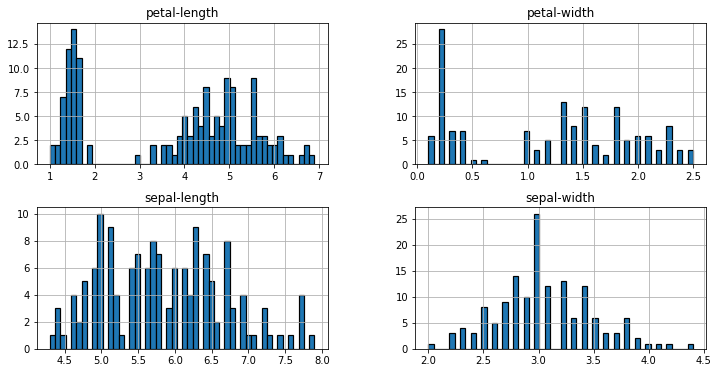

In [7]:
#Univariate Plot Vizualization
data.hist(bins=50, figsize=(20,15),edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

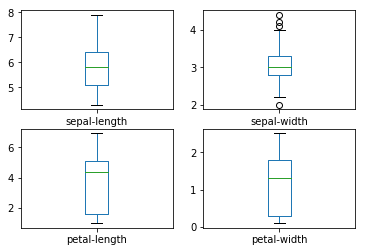

In [8]:
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

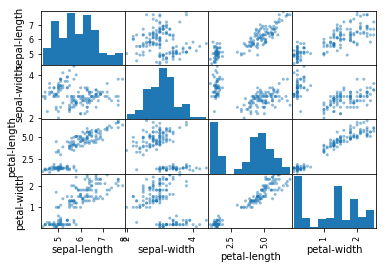

In [19]:
#Multivariate Plot Vizualization
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

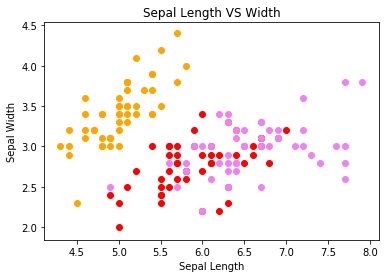

In [72]:
x1=data[data['class']=='Iris-setosa']
x2=data[data['class']=='Iris-versicolor']
x3=data[data['class']=='Iris-virginica']
plt.scatter(x1['sepal-length'],x1['sepal-width'],color='orange', label='Setosa')
plt.scatter(x2['sepal-length'],x2['sepal-width'],color='red', label='Versicolor')
plt.scatter(x3['sepal-length'],x3['sepal-width'],color='violet', label='Virginica')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length VS Width")
plt.show()

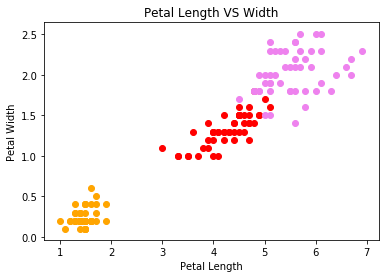

In [73]:
x1=data[data['class']=='Iris-setosa']
x2=data[data['class']=='Iris-versicolor']
x3=data[data['class']=='Iris-virginica']
plt.scatter(x1['petal-length'],x1['petal-width'],color='orange', label='Setosa')
plt.scatter(x2['petal-length'],x2['petal-width'],color='red', label='Versicolor')
plt.scatter(x3['petal-length'],x3['petal-width'],color='violet', label='Virginica')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length VS Width")
plt.show()

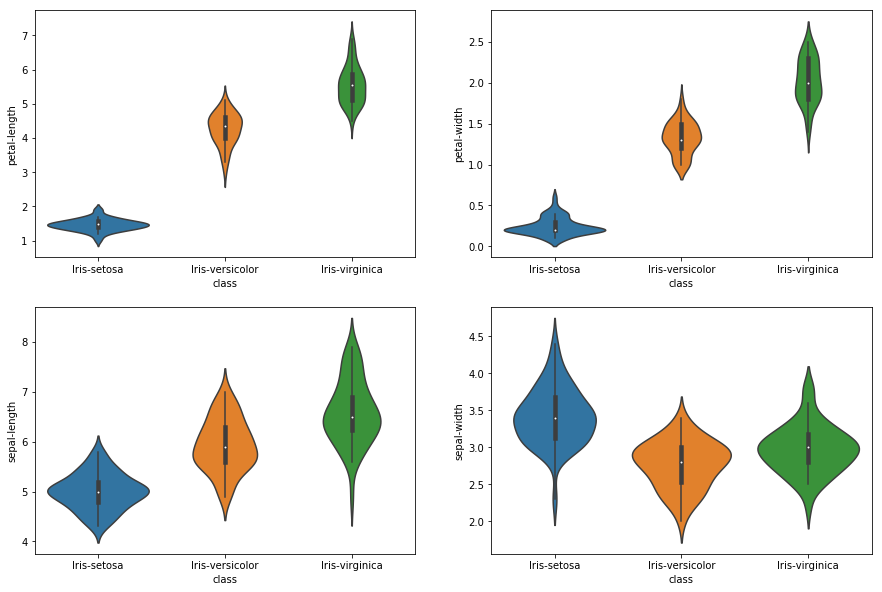

In [77]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='petal-length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='petal-width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepal-length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepal-width',data=data)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

using the classification algorithms to build a model

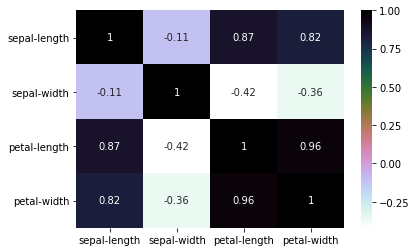

In [9]:
#checking corelation in the features
#plotting heatmap
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [15]:
#splitting the dataset
X=data[['sepal-length','sepal-width','petal-length','petal-width']]
y=data['class']
from sklearn.model_selection import train_test_split
trainX,testX,trainy,testy=train_test_split(X,y,test_size=0.2)
print(trainy.shape)
print(trainX.shape)
print(testX.shape)
print(testy.shape)

(120,)
(120, 4)
(30, 4)
(30,)


In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
model=LogisticRegression()
model.fit(trainX,trainy)
pred=model.predict(testX)
print(metrics.accuracy_score(pred,testy))
print(model.intercept_,model.coef_)

0.9666666666666667
[ 0.25626495  0.74514076 -0.98217866] [[ 0.40356462  1.37134579 -2.16487357 -0.98542221]
 [ 0.35250981 -1.38637466  0.59823023 -1.26841779]
 [-1.56365627 -1.5254749   2.26769038  2.36049409]]


In [22]:
#10-fold cross-validation
from sklearn.cross_validation import cross_val_score
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[1.         1.         1.         0.93333333 0.93333333 0.93333333
 0.8        0.93333333 1.         1.        ]
0.9533333333333334


In [24]:
print(metrics.confusion_matrix(testy, pred))
print(metrics.classification_report(testy, pred))

[[11  0  0]
 [ 0  6  0]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.92      0.96        13

    avg / total       0.97      0.97      0.97        30



Since when we plotted the heatmap we found correlation with two features and thus now we will use Petals and Sepals Seperately 

In [28]:
petal=data[['petal-length','petal-width','class']]
sepal=data[['sepal-length','sepal-width','class']]
p_X=petal[['petal-length','petal-width']]
p_y=petal['class']
s_X=sepal[['sepal-length','sepal-width']]
s_y=sepal['class']

In [30]:
p_train_X,p_test_X,p_train_y,p_test_y=train_test_split(p_X,p_y,test_size=0.3,random_state=0)
s_train_X,s_test_X,s_train_y,s_test_y=train_test_split(s_X,s_y,test_size=0.3,random_state=0) 

In [31]:
model = LogisticRegression()
model.fit(p_train_X,p_train_y) 
pred=model.predict(p_test_X) 
print('Accuracy using Petals:',metrics.accuracy_score(pred,p_test_y))

model.fit(s_train_X,s_train_y) 
pred=model.predict(s_test_X) 
print('Accuracy using Sepals:',metrics.accuracy_score(pred,s_test_y))

Accuracy using Petals: 0.6888888888888889
Accuracy using Sepals: 0.6444444444444445


Using Petals over Sepal for training the data gives a much better accuracy.